## mean-shift, spectral, affinity

In [16]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import KMeans
%matplotlib inline

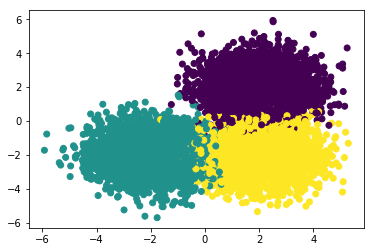

In [2]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [3]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


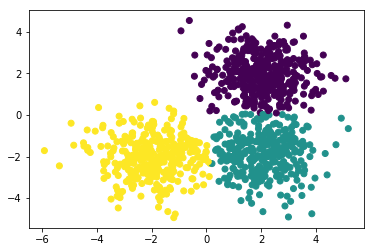

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

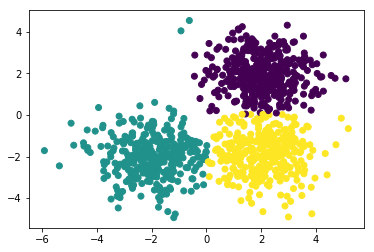

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      350    2   10
1        1  310    9
2        7    6  305


In [5]:
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [6]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


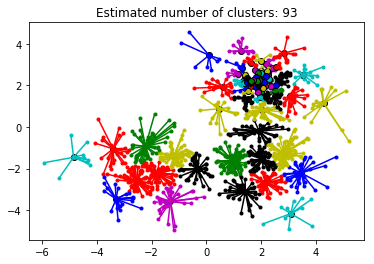

In [7]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Drill Mo's blobs, mo' problems

### New blob one

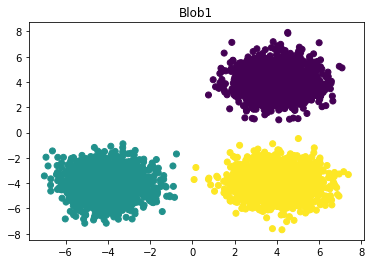

In [71]:
centers = [[4, 4], [-4, -4], [4, -4]]
X, y = make_blobs(
    n_samples=5000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Blob1')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9)

#### KMeans

In [72]:
y_pred = KMeans(n_clusters=3).fit_predict(X_train)

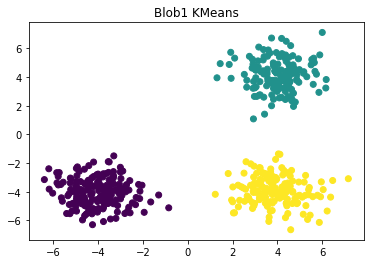

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  160    0
1      182    0    0
2        0    0  158


In [73]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('Blob1 KMeans')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train ,y_pred))

#### MeanShift

In [74]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


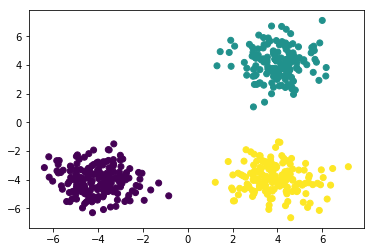

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  160    0
1      182    0    0
2        0    0  158


In [75]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

#### Affinity Propagation

In [76]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 8


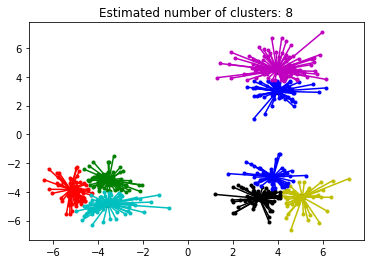

In [77]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

#### Spectral Clustering

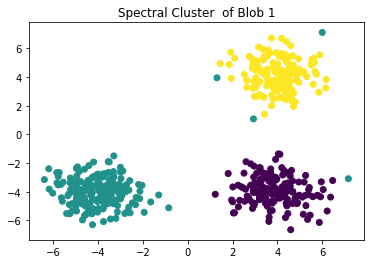

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0    3  157
1        0  182    0
2      157    1    0


In [78]:
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectral Cluster  of Blob 1')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Spectral made some odd choices for a couple of the datapoints that was selected for the blue cluster

#### Affinity Propagation

In [47]:
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 9


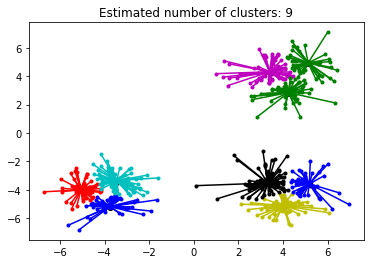

In [48]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### New blob two

For this model I wanted to see how the clusters group data when the data is closer 

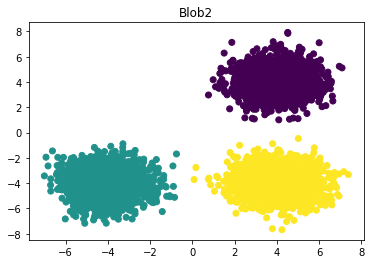

In [68]:
centers = [[1, 1], [-1, -1], [1, -1]]
X1, y1 = make_blobs(
    n_samples=5000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Blob2')
plt.show()

#Divide into training and test sets.
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1,
    y1,
    test_size=0.9)

#### KMeans

In [79]:
y_pred1 = KMeans(n_clusters=3).fit_predict(X_train1)

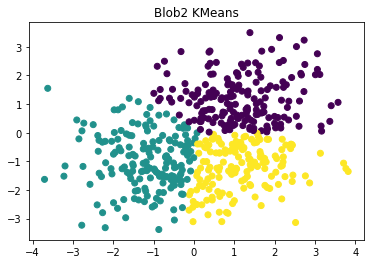

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      140    8   23
1       10  135   21
2       28   27  108


In [80]:
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_pred1)
plt.title('Blob2 KMeans')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1 ,y_pred1))

#### Mean-shift

In [81]:
bandwidth = estimate_bandwidth(X_train1, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train1)

# Extract cluster assignments for each data point.
labels1 = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels1))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 2


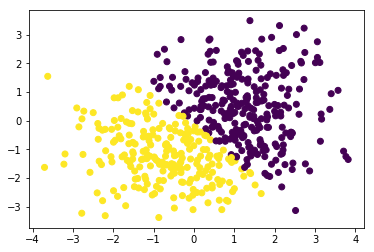

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      163    8
1       17  149
2       95   68


In [82]:
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=labels1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,labels1))

Very interesting that meanshift chose 2 clusters rather than three. 

#### Spectral clustering

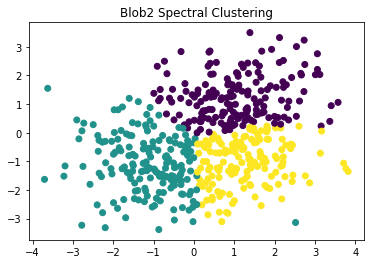

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      137    7   27
1       12  136   18
2       22   32  109


In [83]:
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train1)

#Predicted clusters.
predict1=sc.fit_predict(X_train1)

#Graph results.
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=predict1)
plt.title('Blob2 Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,predict1))

#### Affinity clustering

In [56]:
af = AffinityPropagation().fit(X_train1)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels1 = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 24


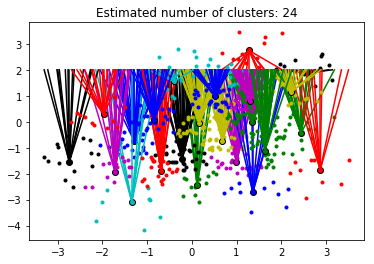

In [57]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels1 == k
    cluster_center = X_train1[cluster_centers_indices[k]]
    plt.plot(X_train1[class_members, 0], X_train1[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x1 in X_train1[class_members]:
        plt.plot([cluster_center[0], x1[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### New blob three

For this model I wanted to see data that was separated a lot more

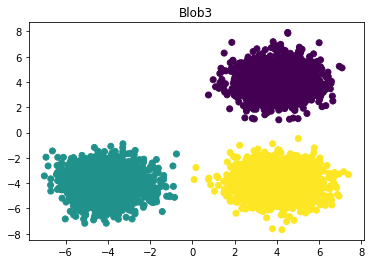

In [84]:
centers = [[10, 10], [-10, -10], [10, -10]]
X2, y2 = make_blobs(
    n_samples=5000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Blob3')
plt.show()

#Divide into training and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.9)

#### KMeans

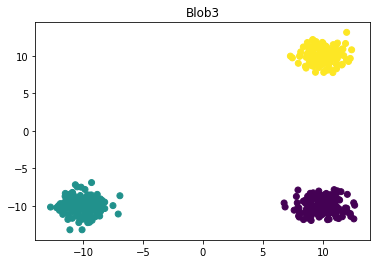

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0    0  174
1        0  165    0
2      161    0    0


In [85]:
y_pred2 = KMeans(n_clusters=3).fit_predict(X_train2)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_pred2)
plt.title('Blob3')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2 ,y_pred2))

#### Spectral Clustering

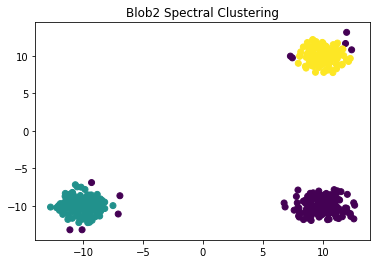

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5    0  169
1        5  160    0
2      161    0    0


In [86]:
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train2)

#Predicted clusters.
predict=sc.fit_predict(X_train2)

#Graph results.
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict)
plt.title('Blob2 Spectral Clustering')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,predict))

The purple clusters had a few interesting choices

#### Affinity Propagation

In [87]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train2)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 162


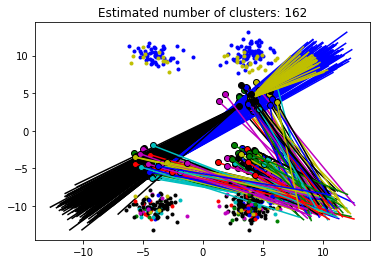

In [88]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x2 in X_train2[class_members]:
        plt.plot([cluster_center[0], x2[0]], [cluster_center[1], x2[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Conclusion

Affinty Propagation seemed to me, to be a little excessive for this problem. 162 clusters to break down the groups on such a simple dataset seemed ridiculous. I do not know if I would use Affintity for datasets unless the data seemed to be blended together well. For the datapoints that was more spread out, the clusters in general seemed to work best. KMeans did consistantly better than the other 3 clustering models.